In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mail-train/MAIL.csv
/kaggle/input/mail-test/MAIL_test.csv


In [1]:
import pandas as pd
import numpy as np

# 1. Data Gathering

In [3]:
df = pd.read_csv('/kaggle/input/mail-train/MAIL.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.148221,-1.000000,-1.000000,-1.000000,-0.754045,-1.000000,-0.718446,-1.0
1,0,-1.000000,-1.000000,-1.000000,-1.0,-0.826910,-0.632182,-1.000000,-1.000000,-0.720307,...,-1.0,-1.0,-0.554151,-1.000000,-0.936759,-0.640316,-1.000000,-0.312254,-1.000000,-1.0
2,0,-1.000000,-0.840000,-0.820690,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-0.635001,...,-1.0,-1.0,-0.608332,-0.916667,-1.000000,-0.763021,-1.000000,-1.000000,-1.000000,-1.0
3,0,-1.000000,-1.000000,-0.886152,-1.0,-1.000000,-0.796825,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.387624,-1.000000,-0.895765,-0.703583,-1.000000,-0.811075,-0.716612,-1.0
4,0,-1.000000,-1.000000,-0.774452,-1.0,-1.000000,-0.798742,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-0.894040,-0.894040,-1.000000,-0.496689,-1.000000,-1.000000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3582,1,-1.000000,-1.000000,-0.825912,-1.0,-0.780697,-1.000000,-0.514563,-0.310679,-1.000000,...,-1.0,-1.0,-0.810101,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0
3583,1,-0.718147,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-0.400795,-1.000000,-0.872510,-0.818725,-1.000000,-1.000000,-0.306773,-1.0
3584,1,-1.000000,-0.854546,-1.000000,-1.0,0.026740,-0.854546,-1.000000,-1.000000,-0.668183,...,-1.0,-1.0,-0.645283,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.589623,-1.0
3585,1,-1.000000,-0.706422,-1.000000,-1.0,-1.000000,-0.706422,-1.000000,-1.000000,-1.000000,...,-1.0,-1.0,-1.000000,-1.000000,-0.841584,-0.549505,-0.247525,-1.000000,-1.000000,-1.0


# 2. Data Pre-Processing

In [4]:
df.shape

(3587, 401)

In [5]:
y = df[0].values                      ## Define Class
X = df.drop([0],axis = 1).values
df.shape

(3587, 401)

In [6]:
allclass = np.unique(y)
allclassnumber = [sum(y==eachclass) for eachclass in allclass]
allclassnumber

[1204, 2383]

# Imbalance Problem

In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X, y)

allclass = np.unique(y_res)
allclassnumber = [sum(y_res==eachclass) for eachclass in allclass]
allclassnumber

[2383, 2383]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)     ## Train-Test Split

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)    ## Split X-Train to X_Val 

In [10]:
from sklearn.decomposition import PCA      ## PCA = n_components คือ กำหนดจน.feature
fr = PCA(n_components=50)
fr.fit(X_train)
X_val = fr.transform(X_val)
X_train = fr.transform(X_train)
X_test = fr.transform(X_test)

In [11]:
from sklearn.preprocessing import MinMaxScaler     ## Normalization  3 dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [12]:
X_train_norm.shape

(3049, 50)

# Choose Model

# 1.Deep Learning

In [13]:
import tensorflow as tf    ## Install tensorflow 2.0.0-beta1

In [18]:
tf.compat.v1.reset_default_graph()                                   # Clear Model / Clear Memory
np.random.seed(1)                                                    # Fix Randomness
tf.compat.v1.random.set_random_seed(1)                               # Fix Randomness
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(150, activation='relu', input_shape=(50,)),   # 14 = Feature , 16 = Node
  tf.keras.layers.Dense(75, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(15, activation='relu'),
  tf.keras.layers.Dropout(0.2),                                      # Dropout คือการแยกข้อมูลออกมา 20% เพื่อกัน Overfitting
  tf.keras.layers.Dense(1, activation='sigmoid')                     # Output layer
])
model.summary()                                                      # Param ยิ่งเยอะอาจจะยิ่ง Overfitting

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 150)               7650      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                11325     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2280      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                465       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 21,736
Trainable params: 21,736
Non-trainable params: 0
____________________________________________________

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])    ## Set up Optimizer to 'adam' with is argubly the best one now, 
                                                                                     ## the loss function is set to binary_crossentropy (Binary Classification).
                                                                                     ## loss='binary_crossentropy' = คลาสเดียว / loss='categority_crossentropy' = หลายคลาส
                                                                                     ## metrics=['accuracy'] / metrics=['loss']

In [32]:
train_acc = list()
val_acc = list()
for i in range(0,1000):                                                                                              ## จน.รอบในการ train
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 200, validation_data= (X_val_norm, y_val))     ## batch_size คือการส่งข้อมูลเข้าไป train
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

16/16 [==============================] - 0s 6ms/step - loss: 0.0172 - accuracy: 0.9941 - val_loss: 1.3144 - val_accuracy: 0.7969


16/16 [==============================] - 0s 5ms/step - loss: 0.0370 - accuracy: 0.9875 - val_loss: 1.3626 - val_accuracy: 0.7903


16/16 [==============================] - 0s 6ms/step - loss: 0.0131 - accuracy: 0.9970 - val_loss: 1.4370 - val_accuracy: 0.8021


16/16 [==============================] - 0s 6ms/step - loss: 0.0623 - accuracy: 0.9800 - val_loss: 1.3381 - val_accuracy: 0.7942


16/16 [==============================] - 0s 5ms/step - loss: 0.0195 - accuracy: 0.9928 - val_loss: 1.3143 - val_accuracy: 0.8021


16/16 [==============================] - 0s 6ms/step - loss: 5.8034e-04 - accuracy: 1.0000 - val_loss: 1.7142 - val_accuracy: 0.7995


16/16 [==============================] - 0s 7ms/step - loss: 0.7201 - accuracy: 0.8160 - val_loss: 0.6686 - val_accuracy: 0.7457


16/16 [==============================] - 0s 6ms/step - loss: 7.1713e-04 - accuracy: 1.0000 - val_loss: 1.7181 - val_accuracy: 0.8087


16/16 [==============================] - 0s 6ms/step - loss: 8.6400e-04 - accuracy: 1.0000 - val_loss: 1.7505 - val_accuracy: 0.8113


16/16 [==============================] - 0s 5ms/step - loss: 1.5171e-04 - accuracy: 1.0000 - val_loss: 2.1741 - val_accuracy: 0.8021


16/16 [==============================] - 0s 5ms/step - loss: 0.0896 - accuracy: 0.9649 - val_loss: 0.9105 - val_accuracy: 0.7969


16/16 [==============================] - 0s 7ms/step - loss: 0.0449 - accuracy: 0.9829 - val_loss: 1.5911 - val_accuracy: 0.7785


16/16 [==============================] - 0s 5ms/step - loss: 0.0180 - accuracy: 0.9951 - val_loss: 1.4554 - val_accuracy: 0.8021


16/16 [==============================] - 0s 6ms/step - loss: 3.0197e-04 - accuracy: 1.0000 - val_loss: 1.8702 - val_accuracy: 0.8152


16/16 [==============================] - 0s 5ms/step - loss: 2.4825e-04 - accuracy: 1.0000 - val_loss: 2.0798 - val_accuracy: 0.8152


16/16 [==============================] - 0s 5ms/step - loss: 7.4270e-04 - accuracy: 1.0000 - val_loss: 1.5944 - val_accuracy: 0.8139


In [33]:
history.history

{'loss': [0.0007427046075463295],
 'accuracy': [1.0],
 'val_loss': [1.5943876504898071],
 'val_accuracy': [0.8138925433158875]}

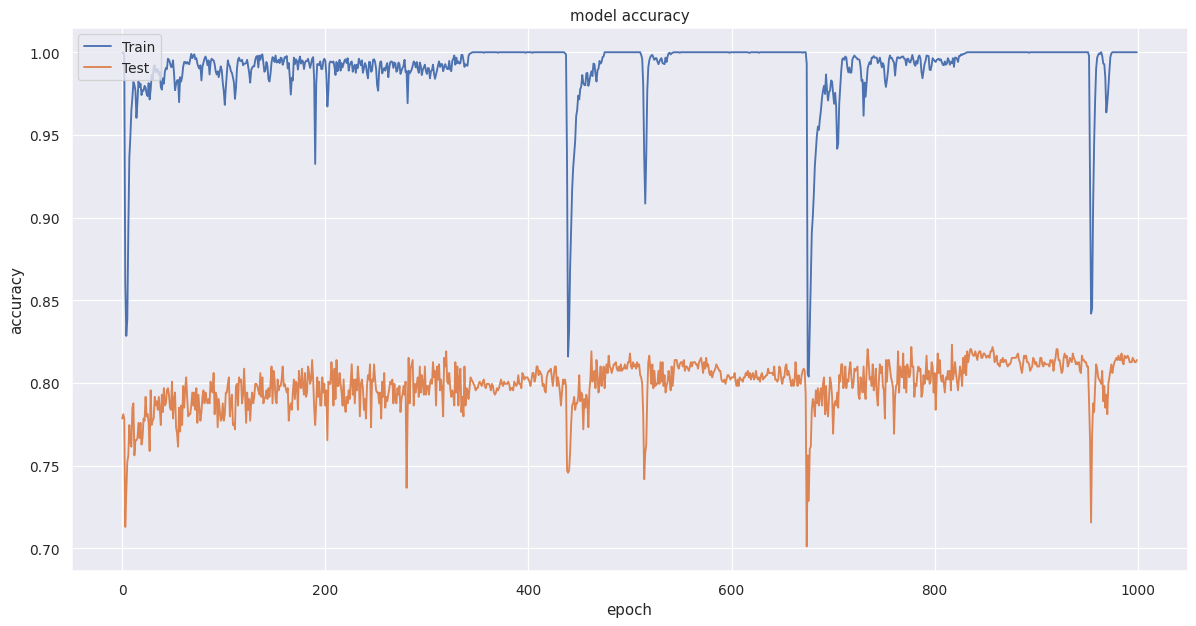

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [35]:
y_predict = np.round(model.predict(X_test_norm))      ## Test Accuracy
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)

0.8270440251572327

# Test

In [39]:
df = pd.read_csv('/kaggle/input/mail-test/MAIL_test.csv', header = None)
df_test = df

In [40]:
y_test = df_test[0].values
X_test = df_test.drop(([0]),axis = 1).values

In [41]:
X_test = fr.transform(X_test)

In [42]:
X_test_norm = scaler.transform(X_test)

In [ ]:
y_predict = np.round(model.predict(X_test_norm))      ## Test Accuracy
y_predict = [i[0] for i in y_predict.tolist()]
sum(y_predict == y_test)/len(y_test)